# Respuesta a una entrada en escalón

Para un escalón de altura $A$ y un sistema de primer orden la salida
$y(s)$ es: 

$$y (s) = \frac{A}{s}  \frac{K_p}{\tau_p s + 1}$$

En tiempo real, invirtiendo las transformadas de Laplace, se obtiene:

$$\label{ec:primer orden real} y (t) = A K_p  \left( 1 - \mathrm{e}^{-
  \frac{t}{\tau_p}} \right)$$

Función de transferencia del proceso, G(s) = 


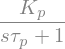

Función de entrada, f(s) = 


Respuesta del proceso, y(s) = 


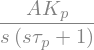

Respuesta del proceso, y(t) =


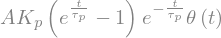

In [1]:
from sympy import *
init_printing()

# Definimos las variables de nuestro sistema
t, A, Kp = symbols("t A K_p", real=True)
# Especificamos que la constante de tiempo es siempre positiva
Tp = symbols('tau_p', positive=True)
s = symbols('s')

G = Kp/(Tp*s + 1)
print("Función de transferencia del proceso, G(s) = ")
display(G)

f = A/s
print("Función de entrada, f(s) = ")
display(f)

y_s = G*f
print("Respuesta del proceso, y(s) = ")
display(y_s)

y = inverse_laplace_transform(G*f, s, t)
print("Respuesta del proceso, y(t) =")
display(y)

Representando la función en coordenadas adimensionales, $\frac{y (t)}{A K_p}$ frente $\frac{t}{\tau_p}$, se obtiene la típica salida de un sistema de primer orden:

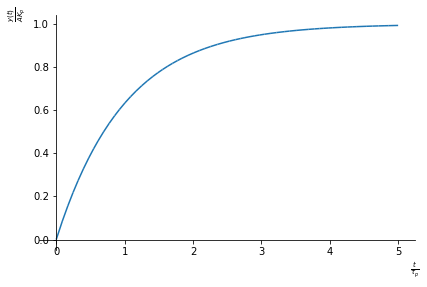

In [2]:
yplot = y.subs(A, 1).subs(Kp,1).subs(Tp,1)

plot(yplot, (t, 0, 5), 
     ylabel=r'$\frac{y(t)}{A K_p}$', xlabel=r'$\frac{t}{\tau_p}$');

## Propiedades de un sistema de primer orden

Cabe destacar las siguientes características de cualquier sistema de
primer orden:

### Autorregulación:

El proceso alcanza un nuevo estado estacionario sin necesidad de un sistema de control.

Se puede comprobar de manera sencilla observando el gráfico anterior. Se puede comprobar que la respuesta a tiempos largos se encuentra acotada o que tiende a un valor concreto.

### Velocidad de la respuesta

Para calcular la velocidad de la respuesta hay que encontrar la pendiente de la respuesta:

$$\frac{\mathrm{d}\left[ \frac{y (t)}{A K_p} \right]}{\mathrm{d}t} = \frac{1}{\tau_p} e^{- \frac{t}{\tau_p}}$$ 
         
Para $t=0$:
        
$$\frac{\mathrm{d}\left[ \frac{y (t)}{A K_p} \right]}{\mathrm{d}t} = \frac{1}{\tau_p}$$ 
         
Cuanto mayor sea $\tau_p$, menor será la pendiente inicial de la respuesta del sistema y mayor será el tiempo necesario en alcanzar el nuevo estado estacionario.
    

Evaluando al ecuación [\[ec:primer orden real\]](#ec:primer orden real){reference-type="ref"    reference="ec:primer orden real"} para diferentes tiempo se obtiene la siguiente tabla:
    
```{table} Evolución de la salida de un sistema de primer orden con el tiempo.
    
| Tiempo transcurrido | $1 \tau_p$ | $2 \tau_p$ | $3 \tau_p$  | $4 \tau_p$ |
|---------------------|------------|------------|-------------|------------|
| $y(t)$ como porcentaje de su valor estacionario | 63.2 | 86.5 | 95.0 | 98.2 |
```
    
El cálculo de estos valores es muy sencillo:

In [3]:
# Calculamos los valores de y(t) para 0, 1, 2, 3 y 4
for tt in range(5):
    # Mostramos los valores expresados como %
    print('%4.1f' % (N(yplot.subs(t, tt))*100))

 0.0
63.2
86.5
95.0
98.2


Transcurrido cuatro veces la constante de tiempo del proceso se puede asegurar que ha llegado el sistema al nuevo estado estacionario.

### Nuevo estado estacionario

La salida del proceso en el nuevo estado estacionario es:

$$\lim_{t \to \infty} y (t) = A K_p$$

Podemos comprobar

In [4]:
limit(y, t, oo)

Cuanto mayor es la ganancia menor debe ser la entrada del sistema (perturbación) para producir el mismo efecto final.

Puede ocurrir que la constante $a_0$ de la ecuación
[\[ec:ode1\]](#ec:ode1){reference-type="ref" reference="ec:ode1"} sea
nula. Este tipo de procesos se conocen como *integradores puros* ya que
la salida es la integral de la entrada con el tiempo. Estos procesos
pueden ser difíciles de controlar debido a que no presentan
autorregulación. Ejemplos comunes de este tipo de sistemas son los
tanques con líquidos, depósitos de gases y sistemas de almacenamiento de
materias primas y productos.